In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
train = pd.read_csv('../data/processed/train.csv')

In [15]:
min = train['zoneArea'].min()
max = train['zoneArea'].max()

In [54]:
train.describe()
train['zoneArea'].mean()

138574.99082380423

(array([8.423e+03, 9.500e+01, 1.300e+01, 8.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([2.22278735e+01, 1.11366025e+06, 2.22729828e+06, 3.34093630e+06,
        4.45457433e+06, 5.56821235e+06, 6.68185038e+06, 7.79548840e+06,
        8.90912643e+06, 1.00227645e+07, 1.11364025e+07, 1.22500405e+07,
        1.33636785e+07, 1.44773165e+07, 1.55909546e+07, 1.67045926e+07,
        1.78182306e+07, 1.89318686e+07, 2.00455067e+07, 2.11591447e+07,
        2.22727827e+07, 2.33864207e+07, 2.45000588e+07, 2.56136968e+07,
        2.67273348e+07, 2.78409728e+07, 2.89546109e+07, 3.00682489e+07,
        3.11818869e+07, 3.22955249e+07, 3.34091630e+07]),
 <a list of 30 Patch objects>)

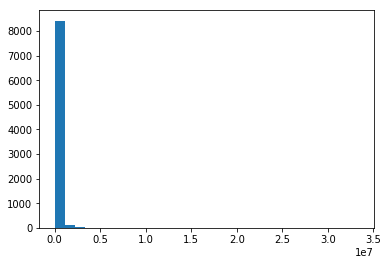

In [33]:
plt.hist(newTrain['zoneArea'].values, bins=30)

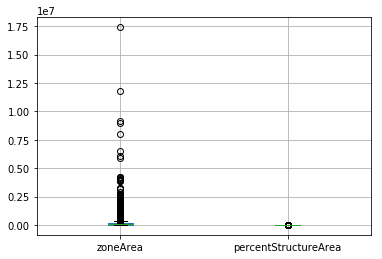

In [63]:
newTrain = train.drop([7850], axis=0)
newTrain.boxplot(column=['zoneArea', 'percentStructureArea'])

In [67]:
print(train['zoneArea'][0])

6935.35696868561


In [71]:
zoneAreaBin = []
one_std = train['zoneArea'].mean()+train['zoneArea'].std()
print(one_std)
for value in train['zoneArea']:
    print(value)
    if(value <= one_std):
        zoneAreaBin.append("Small Area")
    else:
        zoneAreaBin.append("Large Area")
        
print(zoneAreaBin)

678271.6338574484
6935.35696868561
96239.6567361236
13799.151864173702
30704.2748592099
61389.7498343388
115075.62369547
77801.44349791309
375390.733942477
41057.9740999641
69357.295876406
108205.531728315
21391.5221254757
80695.9124990057
301325.928116456
191781.22170854398
134120.08376357402
8090.58815996658
452885.855479417
47697.17360011231
17064.637224299
93817.5058680043
53666.02129647
40435.6178452149
59692.1957721805
44946.5723924676
46673.359927477686
90148.99281122461
8866.293112344209
53589.7882544576
12430.982907605801
40531.7617850327
44165.2671882863
26561.2697737788
55099.9218433835
31685.5796314514
14430.562882901699
17597.5828583728
37759.7316620434
18917.7596363435
12604.070171285
44334.0593508268
124363.290860596
43707.427406358
4774.7758440689095
23114.079858396402
17411.0379567483
21123.6318007597
43183.3329642882
21881.387615468502
21827.4858137788
27722.358727716
141012.037149704
76539.15813412861
15096.0701155979
18407.4930666216
23847.3835372228
54231.429389152

16533.934735591498
11331.5061281173
18269.2264867153
35169.3493617602
36294.7627230877
56598.0255049553
58060.867289443
180640.51477082894
172825.278892639
111197.77163788801
212389.025833577
211251.31024832
49006.065919565895
173615.48379640802
135356.166272484
32826.67350948
442138.521865967
487763.120514079
13912.3488099124
16536.1034741544
5082.33887459443
20050.050973108602
8455.1101659581
63197.6106407775
7900.711682853209
11828.606730571999
3808.95882793437
10494.435531176701
2924.44374637592
43662.6953018079
59204.5492290652
11626.8466478311
11817.3444166092
44648.3524704171
435560.623915318
57908.2048593119
84832.71364944191
9908.49585744924
13021.567043307901
12165.584351213998
11864.7706564072
37437.863016281204
12144.607388598
5034.91301879212
107760.336850125
5914.775068892
6292.67533097737
9387.892252178
16378.067105979399
26097.158781319504
8950.62974246339
12679.471033555501
33251.7446469802
18493.1514721901
10306.3097823651
7825.715865648579
126185.744309321
21171.9827

71269.320929519
102534.002899415
50868.873947799904
39373.61427915991
17581.285941141297
87064.0676116149
30685.015005227004
53182.88779221071
27606.9376417843
99160.805045555
13054.1814748165
178966.959731412
1015419.67803966
241394.95747743602
132605.91174612902
55162.381999220095
510075.2850388221
43701.479090041095
44793.4232455574
34738.9584823335
85476.9498055096
60503.6147489942
181917.578717582
119203.729857724
83516.8816880914
11899.8621852444
15007.423611471799
73915.77177834361
30253.973317194
326435.331142567
20105.895133881102
207872.38413118894
39049.633564602096
417701.584021872
213262.22078220305
151526.56097713902
34783.3717087767
922043.830338642
40840.9684213148
2140833.04383407
481386.702280444
1123467.29480425
190609.688900305
1112.61133126454
1125265.07001513
6590.320780452779
174029.374693867
4784.227215772079
22514.2256552367
3416.03360322481
6224.30522461798
573264.5113179861
17163.8604614346
17586.5504290337
158022.404249146
14923.5339430523
172409.882243826
2

In [37]:
train['zoneArea'].idxmax()

7850

In [26]:
train.iloc[7066]

zoneID                                         215404
zoneArea                                  1.17563e+07
SidewalkCount                                     343
percentSidewalkArea                         0.0464558
Paved ParkingCount                                 41
percentPaved ParkingArea                     0.255093
Paved DrivewayCount                                15
percentPaved DrivewayArea                  0.00716312
PavementCount                                     374
percentPavementArea                         0.0264803
PatioCount                                         67
percentPatioArea                           0.00801916
In Ground PoolCount                                12
percentIn Ground PoolArea                  0.00123451
TankCount                                           5
percentTankArea                           0.000641932
Unpaved DrivewayCount                               3
percentUnpaved DrivewayArea               0.000172726
Uncovered DeckCount         

In [15]:
validation = pd.read_csv('../data/processed/validation.csv')

In [56]:
list(train)

['zoneID',
 'zoneArea',
 'SidewalkCount',
 'percentSidewalkArea',
 'Paved ParkingCount',
 'percentPaved ParkingArea',
 'Paved DrivewayCount',
 'percentPaved DrivewayArea',
 'PavementCount',
 'percentPavementArea',
 'PatioCount',
 'percentPatioArea',
 'In Ground PoolCount',
 'percentIn Ground PoolArea',
 'TankCount',
 'percentTankArea',
 'Unpaved DrivewayCount',
 'percentUnpaved DrivewayArea',
 'Uncovered DeckCount',
 'percentUncovered DeckArea',
 'Compacted SoilCount',
 'percentCompacted SoilArea',
 'BridgeCount',
 'percentBridgeArea',
 'DockCount',
 'percentDockArea',
 'Above Ground PoolCount',
 'percentAbove Ground PoolArea',
 'Recreation Court/Ball FieldCount',
 'percentRecreation Court/Ball FieldArea',
 'Golf CourseCount',
 'percentGolf CourseArea',
 'Unpaved Athletic FieldCount',
 'percentUnpaved Athletic FieldArea',
 'Covered DeckCount',
 'percentCovered DeckArea',
 'Unpaved ParkingCount',
 'percentUnpaved ParkingArea',
 'CourtyardCount',
 'percentCourtyardArea',
 'Open SpaceCoun

In [99]:
sumArea = sum(df[df['ZONING_ID']==133433]['Shape_Area_2'])

In [106]:
df[df['ZONING_ID']==133433].FEATURE.unique()

array(['Paved Driveway', 'Sidewalk', 'Structure', 'Patio',
       'In Ground Pool', 'Courtyard'], dtype=object)

In [112]:
dict(df[df['FEATURE']=='Structure'].groupby(['ZONING_ID'])['Shape_Area_2'].count())

{118721: 3,
 118722: 6,
 118723: 4,
 118724: 5,
 118727: 9,
 118730: 8,
 118731: 9,
 118732: 27,
 118733: 4,
 118734: 4,
 118735: 6,
 118737: 2,
 118738: 6,
 118739: 35,
 118740: 11,
 118741: 9,
 118742: 1,
 118747: 61,
 118748: 9,
 118749: 5,
 118750: 9,
 118753: 7,
 118756: 2,
 118763: 6,
 118823: 1,
 118842: 3,
 118843: 2,
 118844: 1,
 118846: 1,
 118848: 2,
 118849: 1,
 118850: 2,
 118851: 2,
 118852: 1,
 118853: 1,
 118854: 1,
 118855: 1,
 118856: 1,
 118857: 1,
 118858: 3,
 118859: 1,
 118861: 2,
 118862: 1,
 118863: 1,
 118865: 1,
 118866: 3,
 118867: 3,
 118868: 3,
 118869: 3,
 118870: 8,
 118871: 1,
 118872: 1,
 118873: 7,
 118874: 7,
 118875: 1,
 118876: 7,
 118877: 8,
 118878: 2,
 118879: 5,
 118880: 1,
 118882: 3,
 118883: 5,
 118884: 3,
 118885: 2,
 118886: 1,
 118887: 1,
 118888: 3,
 118889: 2,
 118890: 1,
 118891: 1,
 118892: 1,
 118893: 4,
 118894: 1,
 118895: 1,
 118896: 1,
 118897: 1,
 118898: 1,
 118899: 2,
 118902: 1,
 118903: 2,
 118905: 1,
 118906: 2,
 118907: 3,


,OBJECTID,ZONING_ID,ZONING_ZTY,Shape_Area,nJoin_planning_a,FEATURE,Shape_Area_2
9,20617,133433,SF-3-NP,195103.176507,WEST AUSTIN NEIGHBORHOOD GROUP,Paved Driveway,678.16730
10,20617,133433,SF-3-NP,195103.176507,WEST AUSTIN NEIGHBORHOOD GROUP,Paved Driveway,188.04690
157,20617,133433,SF-3-NP,195103.176507,WEST AUSTIN NEIGHBORHOOD GROUP,Sidewalk,329.16914
565,20617,133433,SF-3-NP,195103.176507,WEST AUSTIN NEIGHBORHOOD GROUP,Paved Driveway,330.32575
1726,20617,133433,SF-3-NP,195103.176507,WEST AUSTIN NEIGHBORHOOD GROUP,Structure,2016.93637
1783,20617,133433,SF-3-NP,195103.176507,WEST AUSTIN NEIGHBORHOOD GROUP,Structure,718.02462
1853,20617,133433,SF-3-NP,195103.176507,WEST AUSTIN NEIGHBORHOOD GROUP,Structure,3784.33310
2605,20617,133433,SF-3-NP,195103.176507,WEST AUSTIN NEIGHBORHOOD GROUP,Structure,1950.75429
3099,20617,133433,SF-3-NP,195103.176507,WEST AUSTIN NEIGHBORHOOD GROUP,Structure,4518.33485
3362,20617,133433,SF-3-NP,195103.176507,WEST AUSTIN NEIGHBORHOOD GROUP,Structure,2343.79049


In [26]:
sumArea/df[df['ZONING_ID']==133433]['Shape_Area'][10]

0.4213215613482744

In [9]:
df[df['ZONING_ID']==121413]

,OBJECTID,ZONING_ID,ZONING_ZTY,Shape_Area,nJoin_planning_a,FEATURE,Shape_Area_2
73562,290,121413,CBD,34425.156278,DOWNTOWN,Paved Road,4.289947e+06
121688,290,121413,CBD,34425.156278,DOWNTOWN,Structure,2.992692e+04
125541,290,121413,CBD,34425.156278,DOWNTOWN,Sidewalk,4.414059e+03
129849,290,121413,CBD,34425.156278,DOWNTOWN,Paved Parking,4.520317e+03


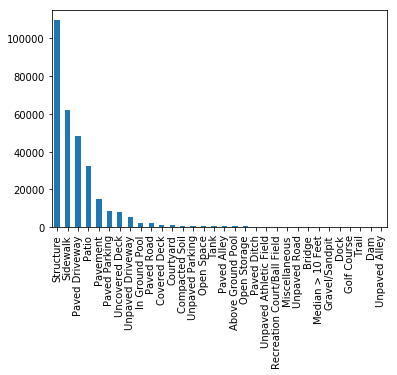

In [10]:
df['FEATURE'].value_counts().plot('bar')

In [11]:
df['FEATURE'].value_counts()

Structure                      109579
Sidewalk                        62095
Paved Driveway                  48444
Patio                           32337
Pavement                        15052
Paved Parking                    8602
Uncovered Deck                   7769
Unpaved Driveway                 5615
In Ground Pool                   2471
Paved Road                       1954
Covered Deck                     1083
Courtyard                         907
Compacted Soil                    730
Unpaved Parking                   688
Open Space                        655
Tank                              592
Paved Alley                       491
Above Ground Pool                 388
Open Storage                      366
Paved Ditch                       332
Unpaved Athletic Field            265
Recreation Court/Ball Field       259
Miscellaneous                     225
Unpaved Road                      216
Bridge                            214
Median > 10 Feet                  163
Gravel/Sandp